In [35]:
import axelrod as axl
import axelrod_dojo as dojo
import matplotlib.pyplot as plt
import pprint

In [45]:
players = [axl.Cooperator(), axl.Defector(), axl.TitForTat(), axl.Alternator(), axl.Grudger()]

In [46]:
tournament = axl.Tournament(players=players, turns=10)
results = tournament.play()
scores = results.scores

Analysing: 100%|██████████| 25/25 [00:00<00:00, 419.71it/s]


[Player(Rank=0, Name='Defector', Median_score=2.7, Cooperation_rating=0.0, Wins=4.0, Initial_C_rate=0.0, CC_rate=0.0, CD_rate=0.0, DC_rate=0.42500000000000004, DD_rate=0.575, CC_to_C_rate=0, CD_to_C_rate=0, DC_to_C_rate=0, DD_to_C_rate=0),
 Player(Rank=1, Name='Grudger', Median_score=2.4, Cooperation_rating=0.575, Wins=1.0, Initial_C_rate=1.0, CC_rate=0.525, CD_rate=0.05, DC_rate=0.1, DD_rate=0.325, CC_to_C_rate=1.0, CD_to_C_rate=0, DC_to_C_rate=0, DD_to_C_rate=0),
 Player(Rank=2, Name='Tit For Tat', Median_score=2.3, Cooperation_rating=0.675, Wins=0.0, Initial_C_rate=1.0, CC_rate=0.525, CD_rate=0.15, DC_rate=0.1, DD_rate=0.225, CC_to_C_rate=1.0, CD_to_C_rate=0, DC_to_C_rate=1.0, DD_to_C_rate=0),
 Player(Rank=3, Name='Alternator', Median_score=2.125, Cooperation_rating=0.5, Wins=2.0, Initial_C_rate=1.0, CC_rate=0.175, CD_rate=0.325, DC_rate=0.275, DD_rate=0.225, CC_to_C_rate=0, CD_to_C_rate=0, DC_to_C_rate=1.0, DD_to_C_rate=1.0),
 Player(Rank=4, Name='Cooperator', Median_score=1.875, C

C:\Users\esali\AppData\Local\Temp\ipykernel_25244\2483534757.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


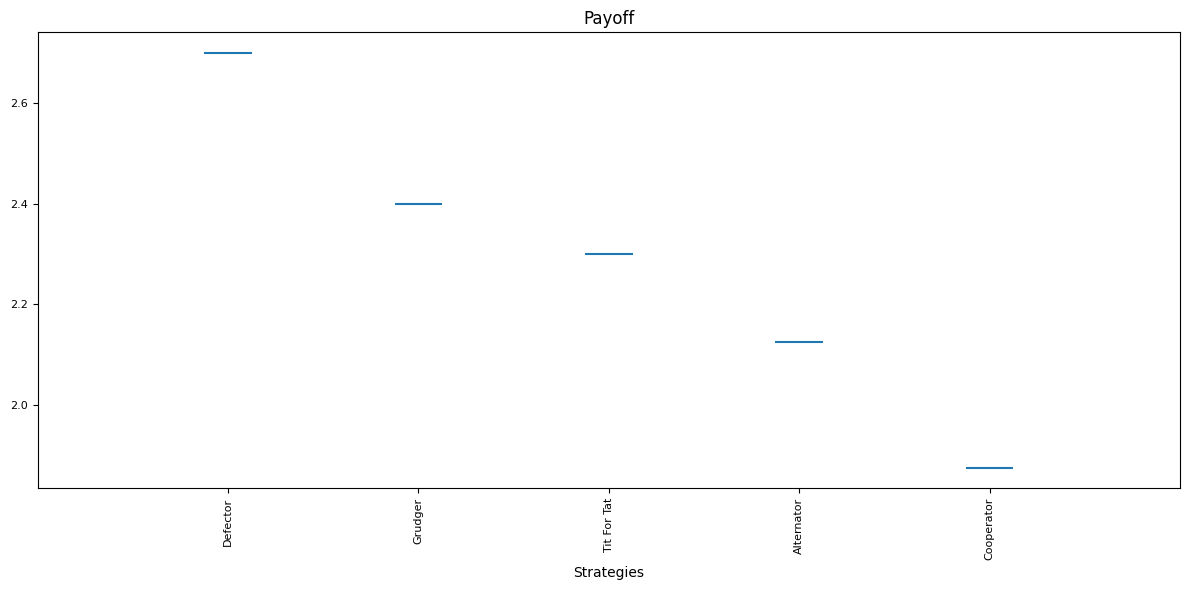

In [47]:
# results set can return a list of named tuples, ordered by strategy rank that summarises the results of the tournament:
summary = results.summarise()
pprint.pprint(summary)

#demonstrating the summary with a box plot
_, ax = plt.subplots()

title = ax.set_title('Payoff')
xlabel = ax.set_xlabel('Strategies')
plot = axl.Plot(results)
p = plot.boxplot(ax=ax)

p.show()

In [48]:
#average scores for each repetition
average_scores = results.scores
print(f"Average_Scores: {average_scores}")

Average_Scores: [[75, 75, 75, 75, 75, 75, 75, 75, 75, 75], [108, 108, 108, 108, 108, 108, 108, 108, 108, 108], [92, 92, 92, 92, 92, 92, 92, 92, 92, 92], [85, 85, 85, 85, 85, 85, 85, 85, 85, 85], [96, 96, 96, 96, 96, 96, 96, 96, 96, 96]]


In [49]:
#finding the best player (Selfish)
best_player = players[average_scores.index(max(average_scores))]
print(f"Best_Player: {best_player}")
results.ranked_names


Best_Player: Defector


['Defector', 'Grudger', 'Tit For Tat', 'Alternator', 'Cooperator']

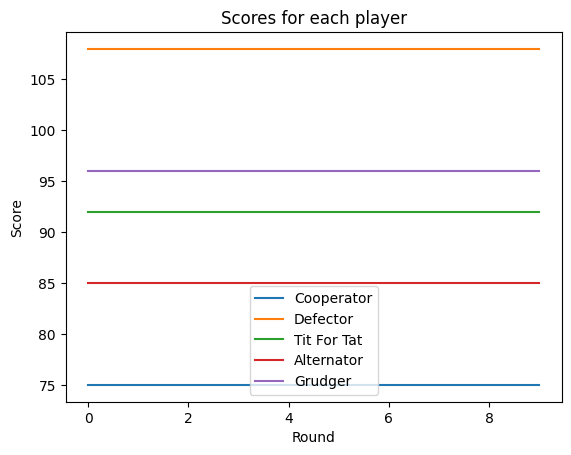

In [50]:
for i, player_scores in enumerate(scores):
    plt.plot(player_scores, label=players[i].name)

# Add a legend, title, and axis labels
plt.legend()
plt.title("Scores for each player")
plt.xlabel("Round")
plt.ylabel("Score")

# Show the plot
plt.show()

In [51]:
#The pair with the highest average score is then identified by iterating through each pair of players and computing the average score for each pair, and keeping track of the pair with the highest average score.
highest_average_score = float("-inf")
best_pair = None

# Iterate through each pair of players
for i in range(len(players)):
    for j in range(i + 1, len(players)):
        # Compute the average score for the current pair of players
        avg_score = sum(scores[i] + scores[j]) / (2 * len(scores[i]))

        # If the average score is higher than the current highest, update the best pair
        if avg_score > highest_average_score:
            highest_average_score = avg_score
            best_pair = (players[i], players[j])

# Print the pair with the highest average
print("Best pair:", best_pair)

Best pair: (Defector, Grudger)


In [52]:
# In this section we will aim to find the best Finite State Machine against a collection of other strategies from the Axelrod library [Harper2017]_.

# We are now going to prepare the training algorithm. First of all, we need to prepare the objective of our strategy. In this case we will aim to maximise score in a match with 10 turns over 1 repetition:

objective = dojo.prepare_objective(name="score", turns=10, repetitions=1)

# The algorithm we are going to use is a genetic algorithm which requires a population of individuals. Let us set up the inputs:

params_class = axl.EvolvableFSMPlayer
#defining the number of states for out finite state machine 
params_kwargs = {"num_states": 2}


In [53]:
# Using this we can now create our Population (with 20 individuals) for a genetic algorithm:

population = dojo.Population(player_class=params_class, params_kwargs=params_kwargs, size=20, objective=objective, output_filename="training_output.csv", opponents=players, bottleneck=2, mutation_probability=.1)

C:\Users\esali\AppData\Roaming\Python\Python310\site-packages\axelrod\player.py:200: UserWarning: Initializing player with seed from Axelrod module random number generator. Results may not be seed reproducible.
  warnings.warn(


In [54]:
generations = 4
population.run(generations)

Scoring Generation 1
Generation 1 | Best Score: 2.44
Scoring Generation 2
Generation 2 | Best Score: 2.5200000000000005
Scoring Generation 3
Generation 3 | Best Score: 2.5200000000000005


C:\Users\esali\AppData\Roaming\Python\Python310\site-packages\axelrod\player.py:200: UserWarning: Initializing player with seed from Axelrod module random number generator. Results may not be seed reproducible.
  warnings.warn(


Scoring Generation 4
Generation 4 | Best Score: 2.5200000000000005


In [12]:
# The last best score is a finite state machine with representation 0:C:0_C_0_C:0_D_1_D:1_C_1_D:1_D_1_D which corresponds to a strategy that stays in state 0 as long as the opponent cooperates but otherwise goes to state 1 and defects forever
# if the strategy is playing Defector or Alternator then it should just defect, otherwise it should cooperate.